<div style="font-size:18pt; padding-top:20px; text-align:center">СЕМИНАР 12. <b>Объединение деревьев и </b> <span style="font-weight:bold; color:green">NumPy/SciPy/Sklearn</span></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin_hse@mail.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Bootstrap Aggregating - Bagging</a>
        <li><a href="#2">Случайный лес - Random Forest</a>
        <li><a href="#3">Extra Trees</a>
        <li><a href="#4">Сравнение методов</a>
        <li><a href="#5">Источники</a>
        </li>
    </ol>
</div>

<p><b>Подлючение библиотек</b></p>

In [1]:
import time
import numpy as np
import pandas as pnd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from scipy import stats

In [3]:
from sklearn import cross_validation

In [4]:
from sklearn.datasets import make_classification
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [5]:
from sklearn import tree

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Bootstrap Aggregating - Bagging</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p><b>Обычное дерево - классификация</b></p>

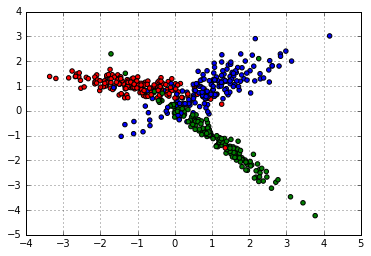

Time = 0.003001689910888672
Test Score =  0.8


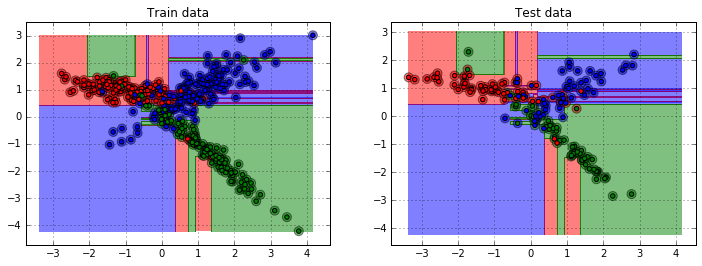

In [6]:
#Исходные данные
n = 500
x, y = make_classification(n_samples=n, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, n_classes=3, class_sep=1,
                           random_state=1234)
clrMap = ListedColormap(["blue", "red", "green"])
plt.scatter(x[:,0], x[:,1], c=y, cmap=clrMap)
plt.grid(True)
plt.show()

#Формирование обучающего и тестового подмножеств
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)

#Обучение
tick = time.time()
decTree = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
decTree.fit(x_train, y_train)
print("Time =", time.time()-tick)

#Проверка на тестовом подмножестве
score_dt_cl = decTree.score(x_test, y_test)
print("Test Score = ", score_dt_cl)

#Графики
step = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), step), np.arange(x[:,1].min(), x[:,1].max(), step))
points = np.c_[xx.ravel(), yy.ravel()]
Z = decTree.predict(points)
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Train data")
plt.contourf(xx, yy, Z, cmap=clrMap, alpha=.5)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_train[:, 0], x_train[:, 1], c=decTree.predict(x_train), s=20, cmap=clrMap)
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Test data")
plt.contourf(xx, yy, Z, cmap=clrMap, alpha=.5)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:,0], x_test[:,1], c=decTree.predict(x_test), s=20, cmap=clrMap)
plt.grid(True)

plt.show()

<p><b>Bootstrap Aggregating - классификация</b></p>

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html">BaggingClassifier</a>

In [7]:
from sklearn.ensemble import BaggingClassifier

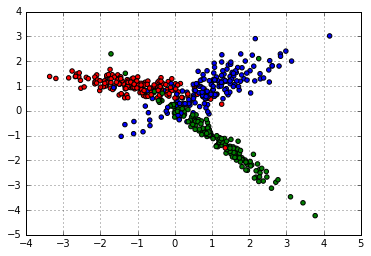

Time = 0.020012855529785156
Test Score =  0.833333333333


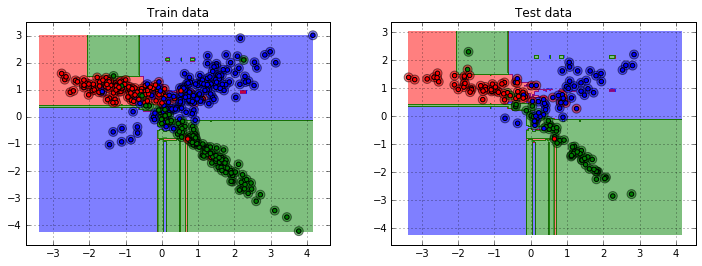

In [8]:
#Исходные данные
n = 500
x, y = make_classification(n_samples=n, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, n_classes=3, class_sep=1,
                           random_state=1234)
clrMap = ListedColormap(["blue", "red", "green"])
plt.scatter(x[:,0], x[:,1], c=y, cmap=clrMap)
plt.grid(True)
plt.show()

#Формирование обучающего и тестового подмножеств
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)

#Обучение
tick = time.time()
decTree = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)

bagCls = BaggingClassifier(base_estimator=decTree, n_estimators=10, max_samples=1.0, max_features=1.0, 
                           bootstrap=True, bootstrap_features=False, oob_score=False, random_state=0)
bagCls.fit(x_train, y_train)
print("Time =", time.time()-tick)

#Проверка на тестовом подмножестве
score_bc_cl = bagCls.score(x_test, y_test)
print("Test Score = ", score_bc_cl)

#Графики
step = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), step), np.arange(x[:,1].min(), x[:,1].max(), step))
points = np.c_[xx.ravel(), yy.ravel()]
Z = bagCls.predict(points)
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Train data")
plt.contourf(xx, yy, Z, cmap=clrMap, alpha=.5)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_train[:, 0], x_train[:, 1], c=bagCls.predict(x_train), s=20, cmap=clrMap)
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Test data")
plt.contourf(xx, yy, Z, cmap=clrMap, alpha=.5)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:,0], x_test[:,1], c=bagCls.predict(x_test), s=20, cmap=clrMap)
plt.grid(True)

plt.show()

<p><b>Обычное дерево - регрессия</b></p>

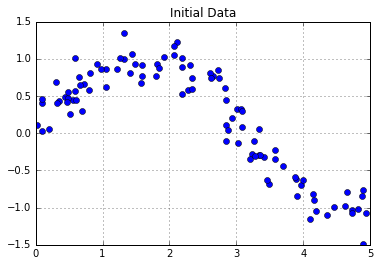

R^2 = 0.824531248085


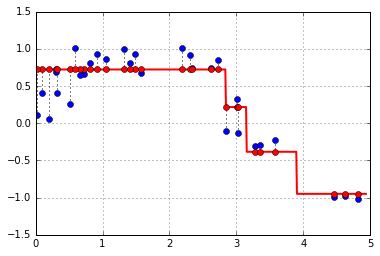

In [9]:
#Исходные данные
n = 100
x = stats.uniform.rvs(size=n, loc=0, scale=5, random_state=0)
y = stats.norm.rvs(size=n, loc=0, scale=0.2, random_state=0) + np.sin(x)
plt.title("Initial Data")
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

#Формирование обучающего и тестового подмножеств
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)
x_train = x_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]

#Обучение
decTreeReg = tree.DecisionTreeRegressor(criterion="mse", max_depth=2, random_state=0)
decTreeReg.fit(x_train, y_train)

#Проверка на тестовом подмножестве
score_dt_reg = decTreeReg.score(x_test, y_test)
print("R^2 =", score_dt_reg)

#Графики
xx = np.arange(x.min(), x.max(), 0.01)[:, np.newaxis]
plt.plot(xx, decTreeReg.predict(xx), c="r", label="max_depth=5", linewidth=2)
plt.plot(x_test, y_test, "o")
plt.vlines(x_test, ymin=y_test, ymax=decTreeReg.predict(x_test), colors="black", linestyles="dotted")
plt.plot(x_test, decTreeReg.predict(x_test), "o", color="red", lw=2)
plt.grid()
plt.show()

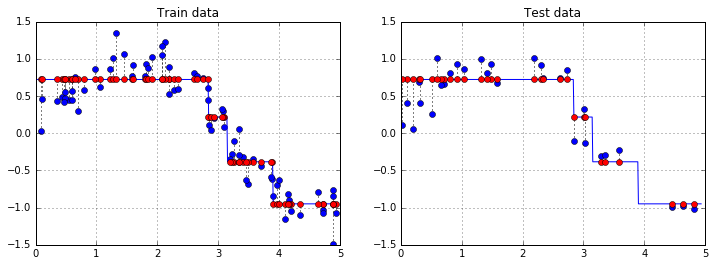

In [10]:
plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Train data")
plt.plot(x_train, y_train, "o")
plt.plot(xx, decTreeReg.predict(xx), c="b", label="max_depth=5", linewidth=1)
plt.plot(x_train, decTreeReg.predict(x_train), "o", color="red", lw=2)
plt.vlines(x_train, ymin=y_train, ymax=decTreeReg.predict(x_train), colors="black", linestyles="dotted")
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Test data")
plt.plot(x_test, y_test, "o")
plt.plot(xx, decTreeReg.predict(xx), c="b", label="max_depth=5", linewidth=1)
plt.plot(x_test, decTreeReg.predict(x_test), "o", color="red", lw=2)
plt.vlines(x_test, ymin=y_test, ymax=decTreeReg.predict(x_test), colors="black", linestyles="dotted")
plt.grid(True)

plt.show()

<p><b>Bootstrap Aggregating - регрессия</b></p>

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html">BaggingRegressor</a>

In [11]:
from sklearn.ensemble import BaggingRegressor

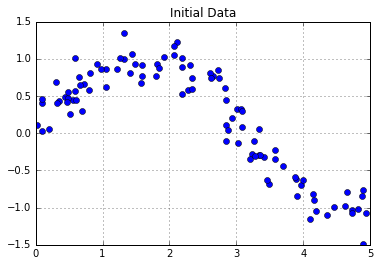

R^2 = 0.856042714094


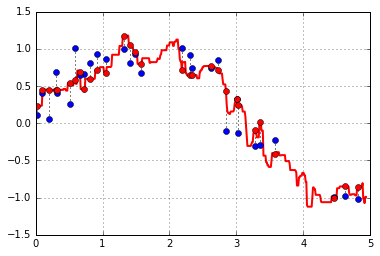

In [12]:
#Исходные данные
n = 100
x = stats.uniform.rvs(size=n, loc=0, scale=5, random_state=0)
y = stats.norm.rvs(size=n, loc=0, scale=0.2, random_state=0) + np.sin(x)
plt.title("Initial Data")
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

#Формирование обучающего и тестового подмножеств
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)
x_train = x_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]

#Обучение
decTreeReg = tree.DecisionTreeRegressor(criterion="mse", max_depth=10, random_state=0)
bagReg = BaggingRegressor(base_estimator=decTreeReg, n_estimators=10, max_samples=1.0, max_features=1.0, 
                           bootstrap=True, bootstrap_features=False, oob_score=False, random_state=0)
bagReg.fit(x_train, y_train)

#Проверка на тестовом подмножестве
score_dt_reg = bagReg.score(x_test, y_test)
print("R^2 =", score_dt_reg)

#Графики
xx = np.arange(x.min(), x.max(), 0.01)[:, np.newaxis]
plt.plot(xx, bagReg.predict(xx), c="r", label="max_depth=5", linewidth=2)
plt.plot(x_test, y_test, "o")
plt.vlines(x_test, ymin=y_test, ymax=bagReg.predict(x_test), colors="black", linestyles="dotted")
plt.plot(x_test, bagReg.predict(x_test), "o", color="red", lw=2)
plt.grid()
plt.show()

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Случайный лес - Random Forest</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p><b>Random Forest - классификация</b></p>

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">RandomForestClassifier</a>

In [13]:
from sklearn.ensemble import RandomForestClassifier

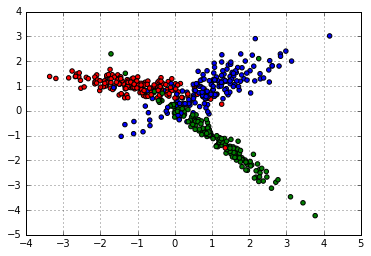

Time = 0.03803086280822754
Test Score =  0.84


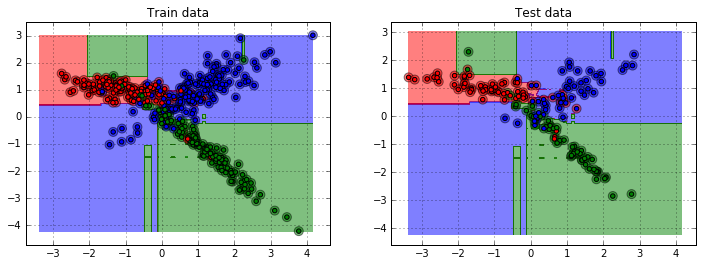

In [14]:
#Исходные данные
n = 500
x, y = make_classification(n_samples=n, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, n_classes=3, class_sep=1,
                           random_state=1234)
clrMap = ListedColormap(["blue", "red", "green"])
plt.scatter(x[:,0], x[:,1], c=y, cmap=clrMap)
plt.grid(True)
plt.show()

#Формирование обучающего и тестового подмножеств
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)

#Обучение
tick = time.time()
randForest = RandomForestClassifier(n_estimators=10, criterion="entropy", bootstrap=True, 
                                    oob_score=False, random_state=0)
randForest.fit(x_train, y_train)
print("Time =", time.time()-tick)

#Проверка на тестовом подмножестве
score_rf_cl = randForest.score(x_test, y_test)
print("Test Score = ", score_rf_cl)

#Графики
step = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), step), np.arange(x[:,1].min(), x[:,1].max(), step))
points = np.c_[xx.ravel(), yy.ravel()]
Z = randForest.predict(points)
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Train data")
plt.contourf(xx, yy, Z, cmap=clrMap, alpha=.5)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_train[:, 0], x_train[:, 1], c=randForest.predict(x_train), s=20, cmap=clrMap)
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Test data")
plt.contourf(xx, yy, Z, cmap=clrMap, alpha=.5)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:,0], x_test[:,1], c=randForest.predict(x_test), s=20, cmap=clrMap)
plt.grid(True)

plt.show()

<p><b>Random Forest - регрессия</b></p>

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html">RandomForestRegressor</a>

In [15]:
from sklearn.ensemble import RandomForestRegressor

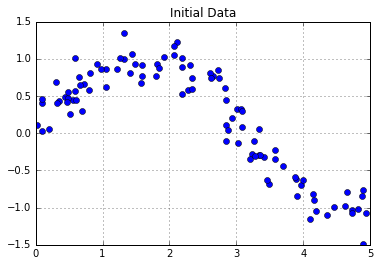

R^2 = 0.856078359518


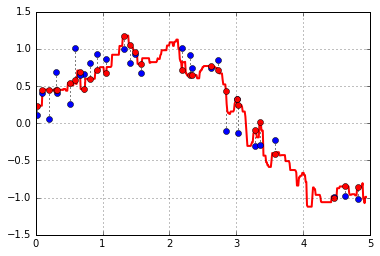

In [23]:
#Исходные данные
n = 100
x = stats.uniform.rvs(size=n, loc=0, scale=5, random_state=0)
y = stats.norm.rvs(size=n, loc=0, scale=0.2, random_state=0) + np.sin(x)
plt.title("Initial Data")
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

#Формирование обучающего и тестового подмножеств
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)
x_train = x_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]

#Обучение
randForestReg = RandomForestRegressor(n_estimators=10, max_depth=10, criterion="mse", bootstrap=True, 
                                    oob_score=False, random_state=0)
randForestReg.fit(x_train, y_train)

#Проверка на тестовом подмножестве
score_rf_reg = randForestReg.score(x_test, y_test)
print("R^2 =", score_rf_reg)

#Графики
xx = np.arange(x.min(), x.max(), 0.01)[:, np.newaxis]
plt.plot(xx, randForestReg.predict(xx), c="r", label="max_depth=5", linewidth=2)
plt.plot(x_test, y_test, "o")
plt.vlines(x_test, ymin=y_test, ymax=randForestReg.predict(x_test), colors="black", linestyles="dotted")
plt.plot(x_test, randForestReg.predict(x_test), "o", color="red", lw=2)
plt.grid()
plt.show()

<a name="3"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">3. Extra Trees</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p><b>Extra Trees - классификация</b></p>

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html">ExtraTreesClassifier</a>

In [17]:
from sklearn.ensemble import ExtraTreesClassifier

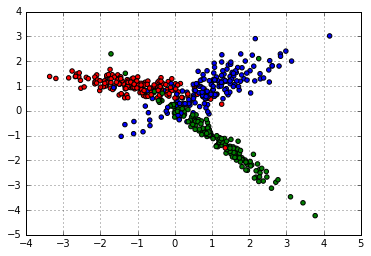

Time = 0.02101588249206543
Test Score =  0.806666666667


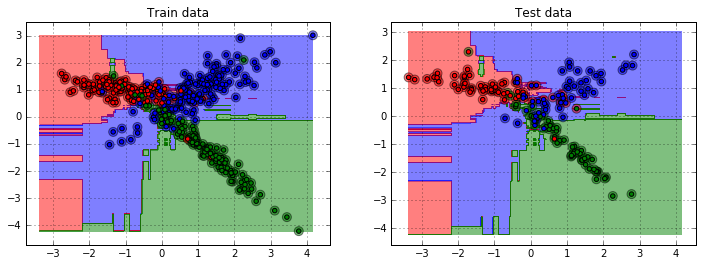

In [18]:
#Исходные данные
n = 500
x, y = make_classification(n_samples=n, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, n_classes=3, class_sep=1,
                           random_state=1234)
clrMap = ListedColormap(["blue", "red", "green"])
plt.scatter(x[:,0], x[:,1], c=y, cmap=clrMap)
plt.grid(True)
plt.show()

#Формирование обучающего и тестового подмножеств
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)

#Обучение
tick = time.time()
randForest = ExtraTreesClassifier(n_estimators=10, criterion="entropy", bootstrap=True, 
                                    oob_score=False, random_state=0)
randForest.fit(x_train, y_train)
print("Time =", time.time()-tick)

#Проверка на тестовом подмножестве
score_rf_cl = randForest.score(x_test, y_test)
print("Test Score = ", score_rf_cl)

#Графики
step = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), step), np.arange(x[:,1].min(), x[:,1].max(), step))
points = np.c_[xx.ravel(), yy.ravel()]
Z = randForest.predict(points)
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Train data")
plt.contourf(xx, yy, Z, cmap=clrMap, alpha=.5)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_train[:, 0], x_train[:, 1], c=randForest.predict(x_train), s=20, cmap=clrMap)
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Test data")
plt.contourf(xx, yy, Z, cmap=clrMap, alpha=.5)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:,0], x_test[:,1], c=randForest.predict(x_test), s=20, cmap=clrMap)
plt.grid(True)

plt.show()

<p><b>Extra Trees - регрессия</b></p>

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html">ExtraTreesRegressor</a>

In [19]:
from sklearn.ensemble import ExtraTreesRegressor

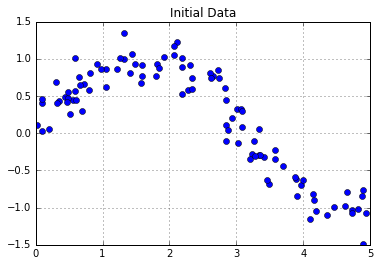

R^2 = 0.866929303879


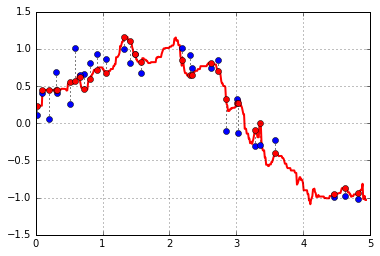

In [20]:
#Исходные данные
n = 100
x = stats.uniform.rvs(size=n, loc=0, scale=5, random_state=0)
y = stats.norm.rvs(size=n, loc=0, scale=0.2, random_state=0) + np.sin(x)
plt.title("Initial Data")
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

#Формирование обучающего и тестового подмножеств
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)
x_train = x_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]

#Обучение
extTrReg = ExtraTreesRegressor(n_estimators=10, max_depth=10, criterion="mse", bootstrap=True, 
                                    oob_score=False, random_state=0)
extTrReg.fit(x_train, y_train)

#Проверка на тестовом подмножестве
score_et_reg = extTrReg.score(x_test, y_test)
print("R^2 =", score_et_reg)

#Графики
xx = np.arange(x.min(), x.max(), 0.01)[:, np.newaxis]
plt.plot(xx, extTrReg.predict(xx), c="r", label="max_depth=5", linewidth=2)
plt.plot(x_test, y_test, "o")
plt.vlines(x_test, ymin=y_test, ymax=extTrReg.predict(x_test), colors="black", linestyles="dotted")
plt.plot(x_test, extTrReg.predict(x_test), "o", color="red", lw=2)
plt.grid()
plt.show()

<a name="4"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">4. Сравнение методов</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

In [21]:
#Задание на семинар

<a name="5"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">5. Источники</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<a href="http://scikit-learn.org/stable/modules/tree.html">Decision Trees</a><br>
<a href="http://scikit-learn.org/stable/modules/ensemble.html">Ensemble methods</a><br>

<a href="http://nbviewer.jupyter.org/github/arundhaj/datamining_class/blob/master/decision_tree.ipynb">DecisionTree Classification</a>